In [1]:
from poliastro.atmosphere import COESA62, COESA76
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt

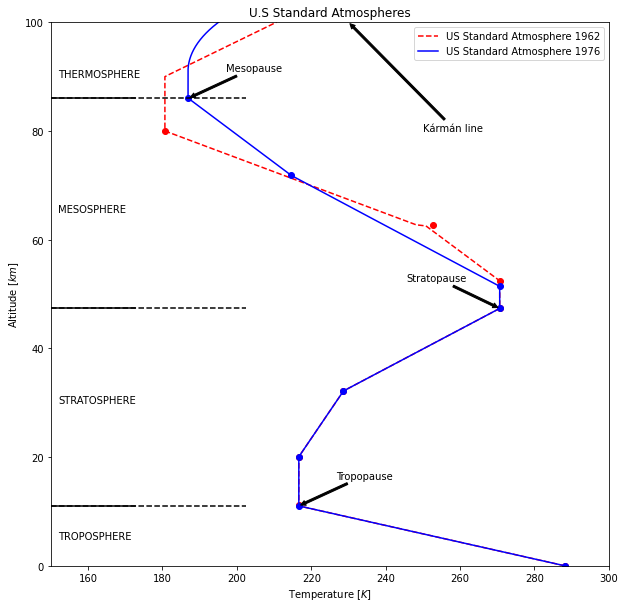

In [5]:
# We build the atmospheric instances
coesa62 = COESA62()
coesa76 = COESA76()

# Create the figure
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("U.S Standard Atmospheres")

# Collect all atmospheric models and define their plotting properties
atm_models = {coesa62: ["--r", "r", "US Standard Atmosphere 1962"], coesa76: ["-b", "b", "US Standard Atmosphere 1976"]}

# Maximum altitude in km
max_alt = 100

# Solve atmospheric temperature for each of the models
for atm in atm_models:
    z_span = np.linspace(0, max_alt, 500) * u.km
    T_span = np.array([]) * u.K
    for z in z_span:
        # We discard density and pressure
        T = atm.temperature(z)
        T_span = np.append(T_span, T)

    # Temperature plot
    ax.plot(T_span, z_span, atm_models[atm][0], label=atm_models[atm][-1])
    ax.plot(atm.Tb_levels[:8], atm.zb_levels[:8], atm_models[atm][1] + "o")
    ax.set_xlim(150, 300)
    ax.set_ylim(0, max_alt)
    ax.set_xlabel("Temperature $[K]$")
    ax.set_ylabel("Altitude $[km]$")
    ax.legend()

# Add some information on the plot
ax.annotate(
    "Tropopause",
    xy=(coesa76.Tb_levels[1].value, coesa76.zb_levels[1].value),
    xytext=(coesa76.Tb_levels[1].value + 10, coesa76.zb_levels[1].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black")
)
ax.annotate(
    "Stratopause",
    xy=(coesa76.Tb_levels[4].value, coesa76.zb_levels[4].value),
    xytext=(coesa76.Tb_levels[4].value - 25, coesa76.zb_levels[4].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black")
)
ax.annotate(
    "Mesopause",
    xy=(coesa76.Tb_levels[7].value, coesa76.zb_levels[7].value),
    xytext=(coesa76.Tb_levels[7].value + 10, coesa76.zb_levels[7].value + 5),
    arrowprops=dict(arrowstyle="simple", facecolor="black")
)

ax.annotate(
    "Kármán line", xy=(230, 100), xytext=(250, 80), arrowprops=dict(arrowstyle="simple", facecolor="black")
)


# Layers in the atmosphere
for h in [11.019, 47.350, 86]:
    ax.axhline(h, color='k', linestyle='--', xmin=0.0, xmax=0.35)
    ax.axhline(h, color='k', linestyle='-', xmin=0.0, xmax=0.15)

layer_names = {"TROPOSPHERE": 5, "STRATOSPHERE": 30, "MESOSPHERE": 65, "THERMOSPHERE": 90}
for name in layer_names:
    ax.annotate(
        name,
        xy=(152, layer_names[name]),
        xytext=(152, layer_names[name]),
    )

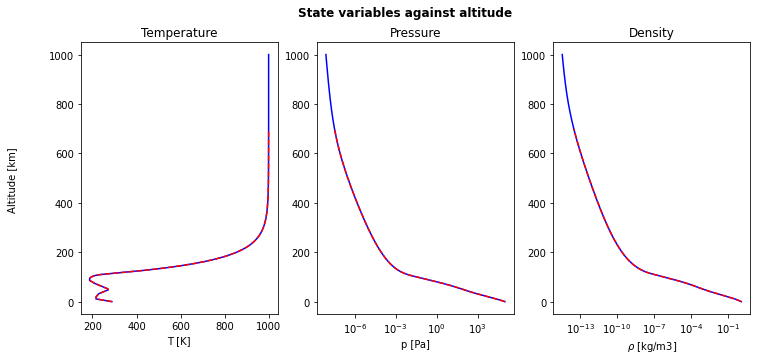

In [3]:
# We create the basis for the figure
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("State variables against altitude", fontweight="bold")
fig.text(0.04, 0.5, 'Altitude [km]', va='center', rotation='vertical')

# Complete altitude range and initialization of state variables sets
alt_span = np.linspace(0, 1000, 1001) * u.km
T_span76 = np.array([]) * u.K
p_span76 = np.array([]) * u.Pa
rho_span76 = np.array([]) * u.kg / u.m ** 3

T_span62 = np.array([]) * u.K
p_span62 = np.array([]) * u.Pa
rho_span62 = np.array([]) * u.kg / u.m ** 3

# We solve for each property at given altitude
for alt in alt_span:
    T, p, rho = coesa76.properties(alt)
    T_span76 = np.append(T_span76, T)
    p_span76 = np.append(p_span76, p.to(u.Pa))
    rho_span76 = np.append(rho_span76, rho)

    if alt < 700*u.km:
        T, p, rho = coesa62.properties(alt)
        T_span62 = np.append(T_span76, T)
        p_span62 = np.append(p_span76, p.to(u.Pa))
        rho_span62 = np.append(rho_span76, rho)


T_span62 = T_span62[:-1]
p_span62 = p_span62[:-1]
rho_span62 = rho_span62[:-1]

# Temperature plot
axs[0].set_title("Temperature")
axs[0].set_xlabel("T [K]")
axs[0].plot(T_span76, alt_span, color="blue")
axs[0].plot(T_span62, alt_span[:700], color="red", linestyle="dashed")

# Pressure plot
axs[1].set_title("Pressure")
axs[1].set_xlabel("p [Pa]")
axs[1].plot(p_span76, alt_span, color="blue")
axs[1].plot(p_span62, alt_span[:700], color="red", linestyle="dashed")
axs[1].set_xscale('log')

# Density plot
axs[2].set_title("Density")
axs[2].set_xlabel(r"$\rho$ [kg/m3]")
axs[2].plot(rho_span76, alt_span, color="blue")
axs[2].plot(rho_span62, alt_span[:700], color="red", linestyle="dashed")
axs[2].set_xscale('log')